# setup

## import libraries

In [76]:
from sklearn import datasets
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.lines

## variables

In [2]:
# Initialize
#normalizer = preprocessing.Normalization(axis=-1)
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Scaling the data - Neural networks tend to work better on scaled features
scaler = MinMaxScaler()

## methods

In [1]:
def unique_values(df, col):
    '''
    Displays the unique number and unique values
    '''
    if isinstance(col, list):
        for i in col:
            cnt = 0
            visited = []
            for j in range(0, len(df[i])):
                if df[i][j] not in visited: 
                    visited.append(df[i][j])
                    cnt += 1
            print(f'\n{i}')
            print(f'no.of.unique values : {cnt}')
            if len(visited) < 20:
                print(f'unique values : {visited}')


    else:
        cnt = 0
        visited = []
        for j in range(0, len(df[col])):
            if df[col][j] not in visited: 
                visited.append(df[col][j])
                cnt += 1
        print(f'\n{col}')
        print(f'no.of.unique values : {cnt}')
        if len(visited) < 20:
            print(f'unique values : {visited}')
            
def model_parameters(seed_,
                     units_for_layers,
                     optimizer_,
                     loss_metric,
                     model_summary,
                     epochs_,
                     verbose_,
                     normalized,
                     X_train_,
                     X_test_,
                     y_train_,
                     y_test_,
                     model_view,
                     compiled_model_view,
                     predict_,
                     evaluate_,
                     loss_epoch_plot,
                     predict_plot,
                     figsize,
                     plot_font_size = 10,
                     activation = False):
    
    # optimizer text 
    optimizer_ = 'tf.optimizers.' + str(optimizer_) + '()'
        
    # Set random seed
    tf.random.set_seed(seed_)
    
    # loss metric text
    loss_text = 'tf.losses.' + str(loss_metric)
    metric_text = 'tf.metrics.' + str(loss_metric)
    
    # Create a new model (same as model_2)
    if normalized:
        model_start_ = 'tf.keras.Sequential([\nnormalized,'    
    else:
        model_start_ = 'tf.keras.Sequential([\n'
    model_end_ = '])'
    model_middle = ''
    
    for nr,i in enumerate(units_for_layers):  
        if activation:
            temp = "      tf.keras.layers.Dense(" + str(i) + ", activation = '" + activation +"')"
        else:
            temp = '      tf.keras.layers.Dense(' + str(i) + ')'
            
        model_middle = model_middle + temp +',\n'
            
    # Create a model using the sequntial API
    model_text = model_start_ + model_middle + model_end_
    if model_view:
        print(f'\n\nMODEL CREATION : \n{model_text}')
    
    model_ = eval(model_text)

    # Compile the model
    compiled_model_text = 'model_.compile(\n     loss = ' + loss_text +\
                                    ',\n     optimizer = ' + optimizer_ +\
                                    ',\n     metrics = ' + metric_text + '\n)'
    eval(compiled_model_text)    
    
    if compiled_model_view:
        print(f'\n\nCOMPILED MODEL : \n{compiled_model_text}\n\n')  
        
    # Fit the model
    fit_model = model_.fit(X_train_,
                           y_train_,
                           epochs=epochs_,
                           verbose=verbose_,
                           validation_data=(X_test_, y_test_))

    # Print model summary
    if model_summary:
        print(f'\nMODEL SUMMARY :')
        print(model_.summary())
        
    # Evaluate
    if evaluate_:
        print(f'\nEVALUATE (VALIDATION) :')
        print(model_.evaluate(X_test_, y_test_))
    
    # create DataFRame
    df_hist = pd.DataFrame(fit_model.history)

    # loss_epoch_plot
    if loss_epoch_plot:
        print('\n')
        
        plt.figure(figsize=(eval(figsize)))
        plt.plot(df_hist)
        plt.ylabel('loss', fontsize = plot_font_size)
        plt.xlabel('epochs', fontsize = plot_font_size)
        plt.show()
        
    # Plot predictions vs real value
    y_pred = model_.predict(X_test_)
    y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
    y_pred_df['y_test'] = pd.DataFrame(y_test_)

    if predict_plot:
        print('\n')
        
        # Plotting a predicted vs true values with a regression and Confidence Interval = 95%
        plt.figure(figsize=(eval(figsize)))
        y_reg = sns.regplot(data=y_pred_df,
                            x = y_pred,
                            y = y_test,
                            line_kws=dict(color = 'black'),
                            scatter_kws=dict(color = 'gray'))
        y_reg.set_xlabel('Y Predicted', fontsize = plot_font_size)
        y_reg.set_ylabel('Y Real', fontsize = plot_font_size)
        ideal_line = matplotlib.lines.Line2D([10,50],[10,50],color = 'red')
        y_reg.add_line(ideal_line)
        y_reg.legend(['Predictions Trendline', 'Ideal Trendline', 'Predictions'],
                      fontsize = plot_font_size, loc = 4)
        y_reg.set_title('Y Real (test) VS Y Predicted', fontsize = plot_font_size)
        fig = y_reg.get_figure()
    
    return(fit_model)
    

# Obtain data

In [4]:
# get boston housing data from sklearn 
boston = datasets.load_boston()

In [5]:
X = boston.data
y = boston.target

print(f'X data shape : {X.shape}')
print(f'y data shape : {y.shape}')


X data shape : (506, 13)
y data shape : (506,)


# Visualizing the dataset


Output variable :
+--------+
|   MEDV |
|--------|
|   24   |
|   21.6 |
|   34.7 |
|   33.4 |
|   36.2 |
+--------+

Input variables :
+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+
|    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |
|---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------|
| 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 | 4.09   |     1 |   296 |      15.3 | 396.9  |    4.98 |
| 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 | 396.9  |    9.14 |
| 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |
| 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |
| 0.06905 |    0 |    2.18 |      0 |

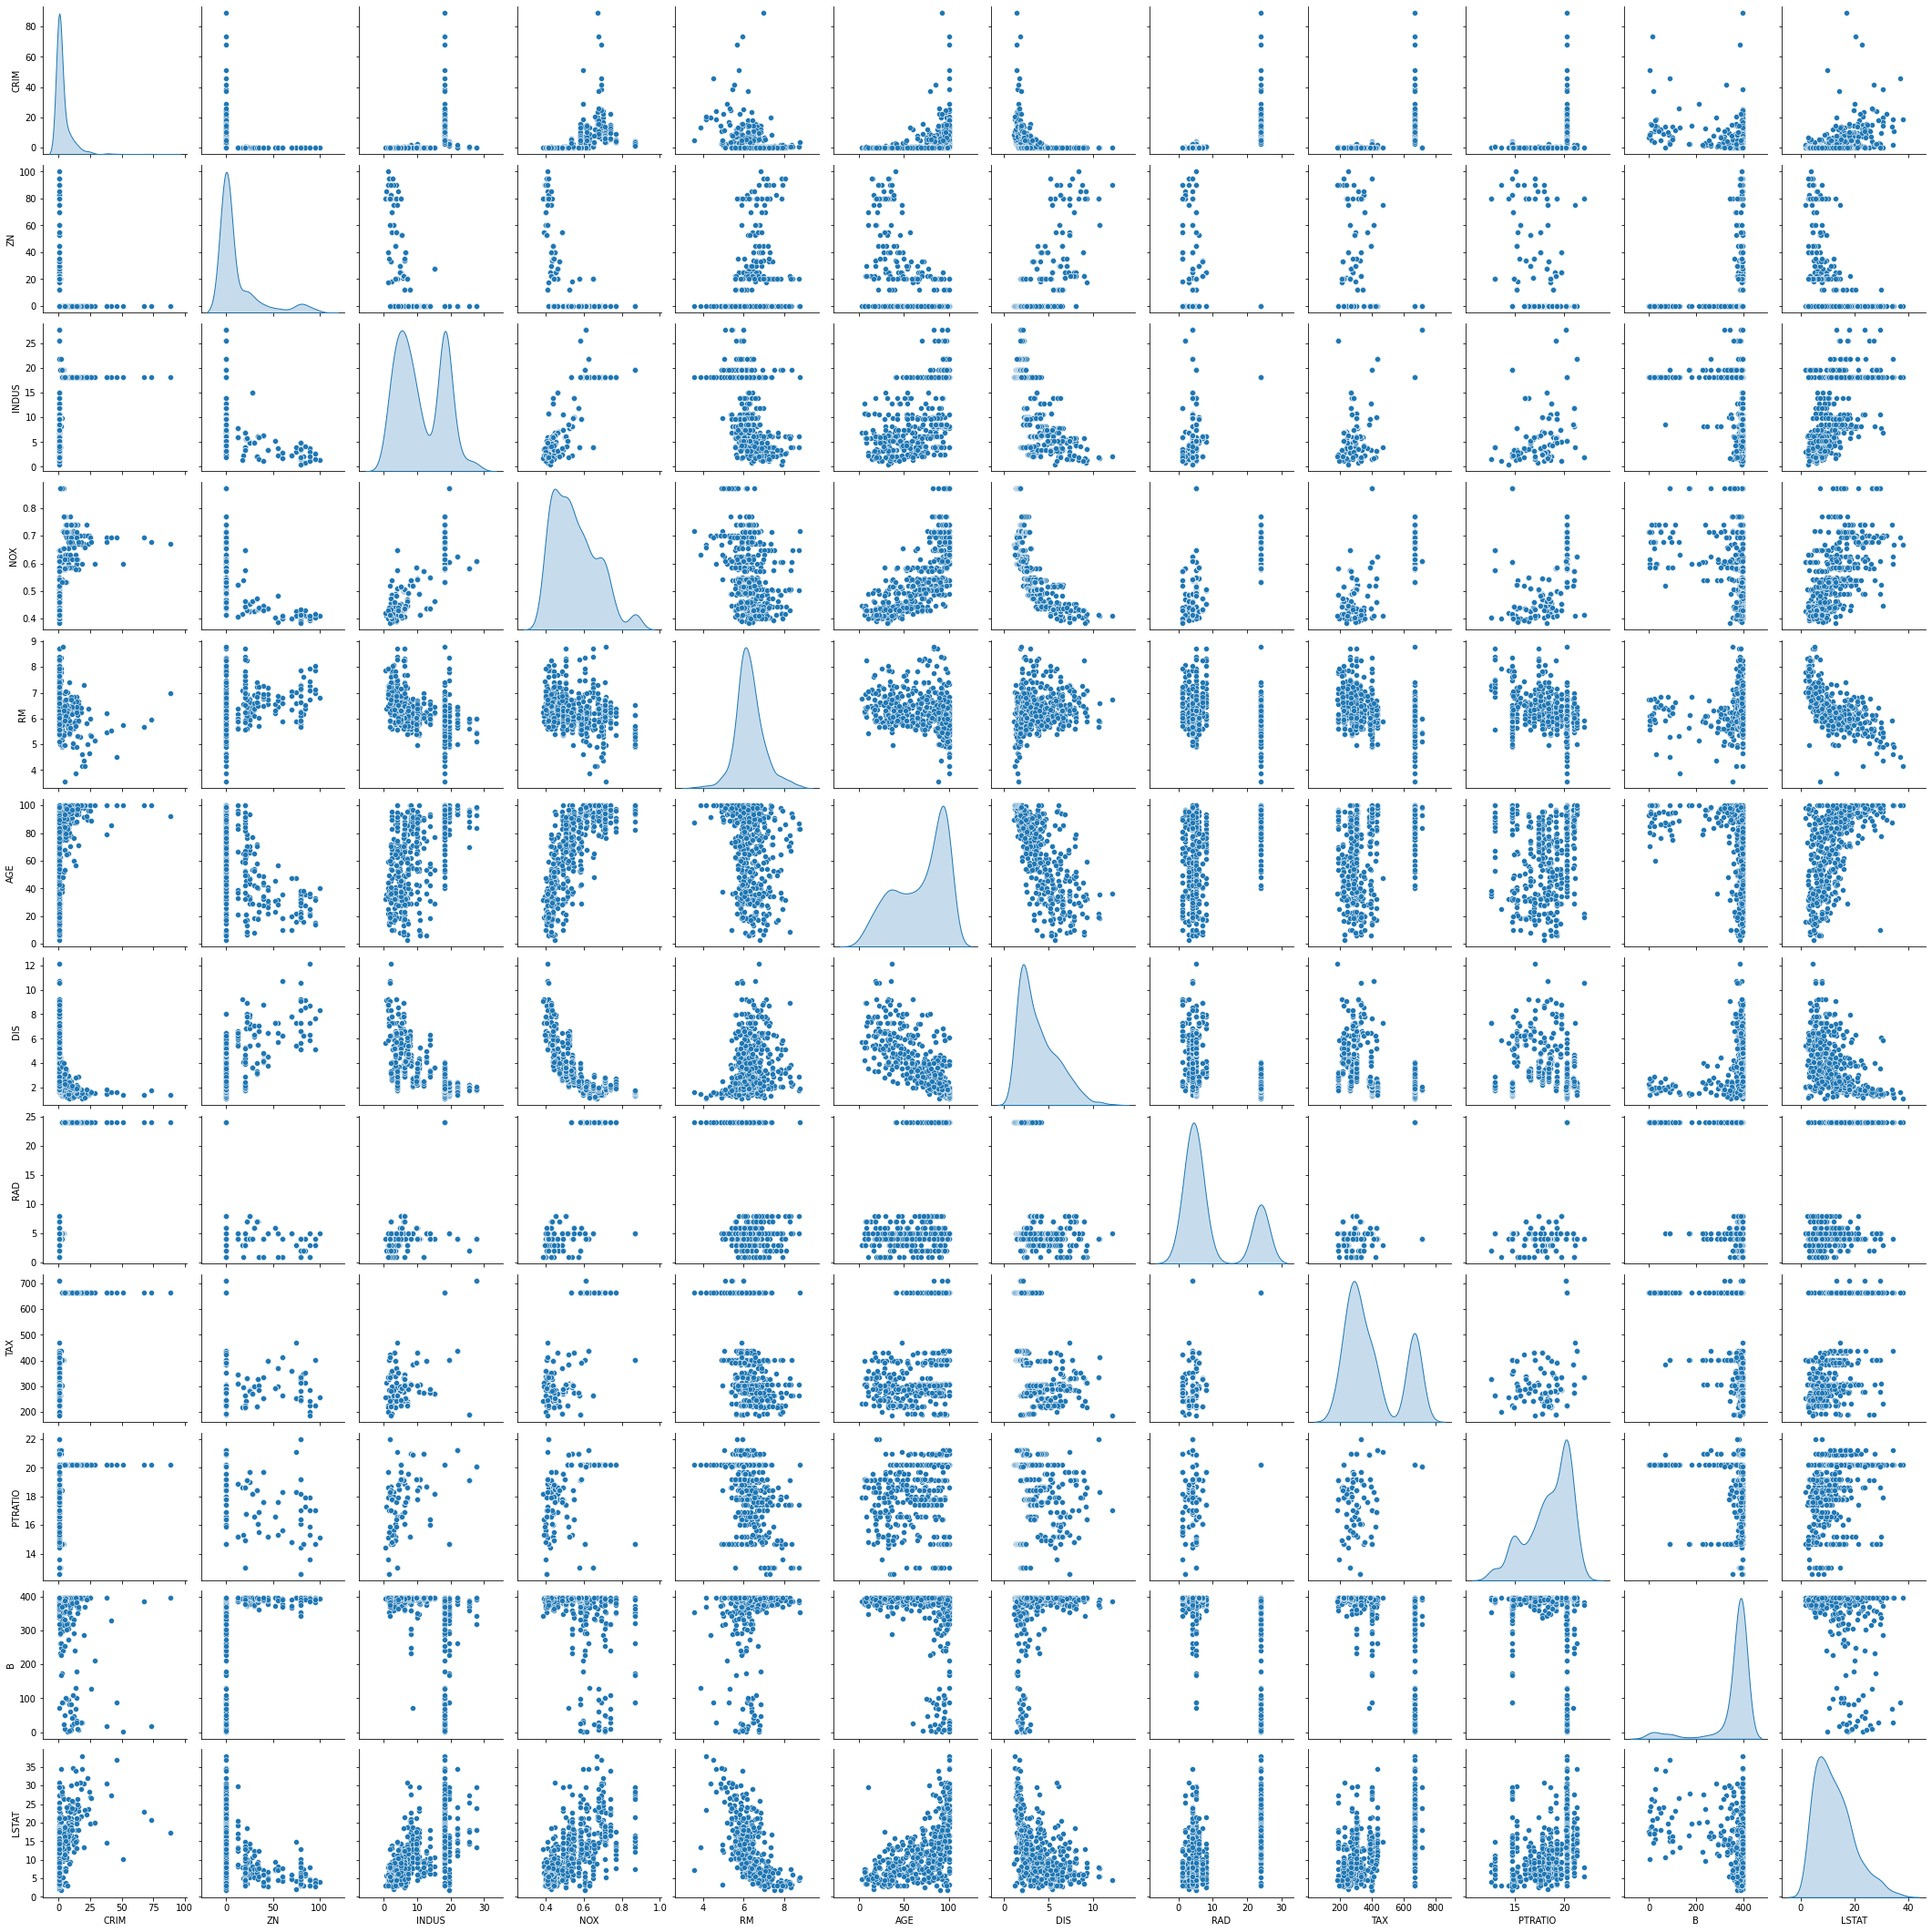

In [6]:
input_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
output_columns = ['MEDV']

x_df = pd.DataFrame(data=X, columns=input_columns)
y_df = pd.DataFrame(data=y, columns=output_columns)


print('\nOutput variable :')
print(tabulate(y_df.head(5), headers='keys', tablefmt='psql', showindex=False))

print('\nInput variables :')
print(tabulate(x_df.head(5), headers='keys', tablefmt='psql', showindex=False))
print('\nStatistics :')
print(tabulate(x_df.describe().transpose(), headers='keys', tablefmt='psql', showindex=True))

unique_values(x_df, input_columns)

sns.pairplot(x_df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']], diag_kind='kde');

# Pre-processing

## sample of normalization

In [7]:
# first = np.array(x_df[:1])
# print(display(x_df.head(1)))

# with np.printoptions(precision=3, suppress=True):
#     print('First example:', first)
#     print()
#     print('Normalized:', normalizer(first).numpy())

# #print(tabulate(x_df_norm.sample(10), headers='keys', tablefmt='psql', showindex=True))

# split variables

In [8]:
# Create training and test sets
train_split = 0.8
test_split = 1 - train_split  

X_train, X_test, y_train, y_test = train_test_split(x_df, 
                                                    y, 
                                                    test_size=test_split, 
                                                    random_state=42) # set random state for reproducible splits

In [9]:
print(f'X train : {X_train.shape}')
print(f'X test : {X_test.shape}')
print(f'Y train : {y_train.shape}')
print(f'Y test : {y_test.shape}')

X train : (404, 13)
X test : (102, 13)
Y train : (404,)
Y test : (102,)


## Normalization

In [10]:
# #normalizer.adapt(np.array(x_df))
# X_train_norm = preprocessing.normalize(X_train)
# X_test_norm = preprocessing.normalize(X_test)

# X_train_norm_df = pd.DataFrame(data=X_train_norm, columns=input_columns)

# print('\nOriginal input variable :')
# print(tabulate(x_df.head(5), headers='keys', tablefmt='psql', showindex=False))

# print('\nNormalized input variable :')
# print(tabulate(X_train_norm_df.head(5), headers='keys', tablefmt='psql', showindex=False))



In [11]:
## Alt - fit transform

In [12]:

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm_df = pd.DataFrame(data=X_train_norm, columns=input_columns)

print('\nOriginal input variable :')
print(tabulate(x_df.head(5), headers='keys', tablefmt='psql', showindex=False))

print('\nNormalized input variable :')
print(tabulate(X_train_norm_df.head(5), headers='keys', tablefmt='psql', showindex=False))



Original input variable :
+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+
|    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |
|---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------|
| 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 | 4.09   |     1 |   296 |      15.3 | 396.9  |    4.98 |
| 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 | 396.9  |    9.14 |
| 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |
| 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |
| 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 |     3 |   222 |      18.7 | 396.9  |    5.33 |
+---------+------+---------+-



MODEL CREATION : 
tf.keras.Sequential([
      tf.keras.layers.Dense(1),
])


COMPILED MODEL : 
model_.compile(
     loss = tf.losses.mae,
     optimizer = tf.optimizers.SGD(),
     metrics = tf.metrics.mae
)



MODEL SUMMARY :
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
None

EVALUATE (VALIDATION) :
4/4 [==============================] - 0s 998us/step - loss: 6.1657 - mean_absolute_error: 6.1657
[6.165720462799072, 6.165720462799072]




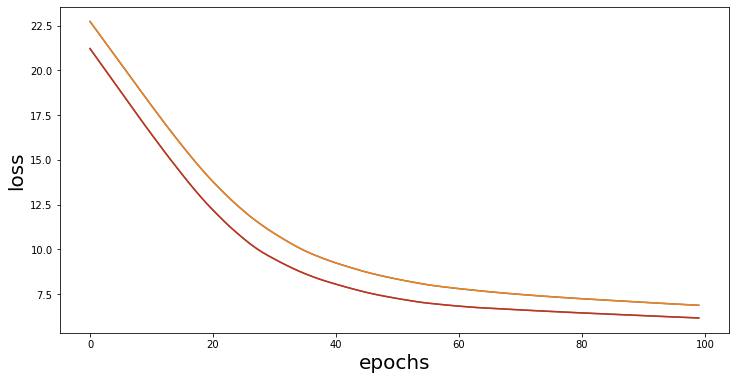

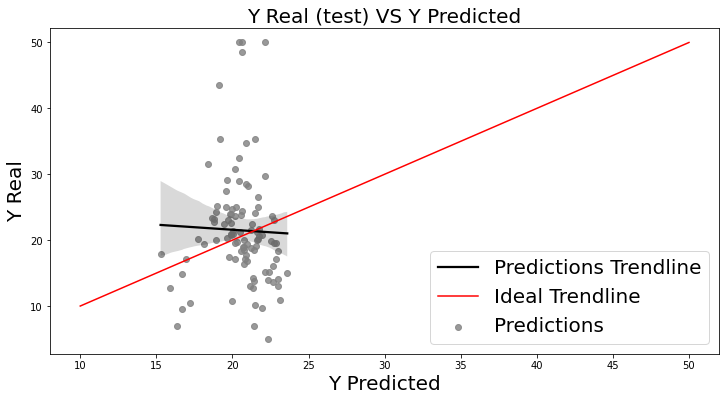

In [86]:
fit_model = model_parameters(seed_ = 42,
                             units_for_layers=[1],
                             optimizer_='SGD',
                             loss_metric='mae',
                             activation = False,
                             model_summary = True,
                             epochs_ = 100,
                             verbose_ = 0,
                             normalized = False,
                             X_train_ = X_train_norm,
                             X_test_ = X_test_norm,
                             y_train_ = y_train,
                             y_test_ = y_test,
                             model_view = True,
                             compiled_model_view = True, 
                             predict_ = True,
                             evaluate_ = True,
                             loss_epoch_plot = True,
                             predict_plot = True,
                             figsize = '12, 6',
                             plot_font_size = 20)




MODEL CREATION : 
tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = 'relu'),
      tf.keras.layers.Dense(100, activation = 'relu'),
      tf.keras.layers.Dense(100, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'relu'),
])


COMPILED MODEL : 
model_.compile(
     loss = tf.losses.mae,
     optimizer = tf.optimizers.Adam(),
     metrics = tf.metrics.mae
)



MODEL SUMMARY :
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_87 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_88 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_89 (Dense)             (Non

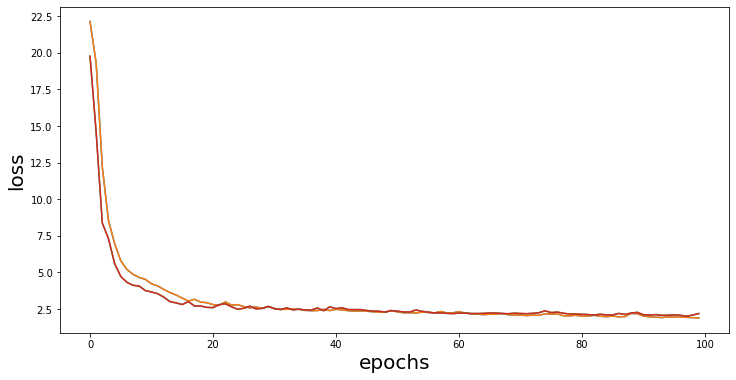

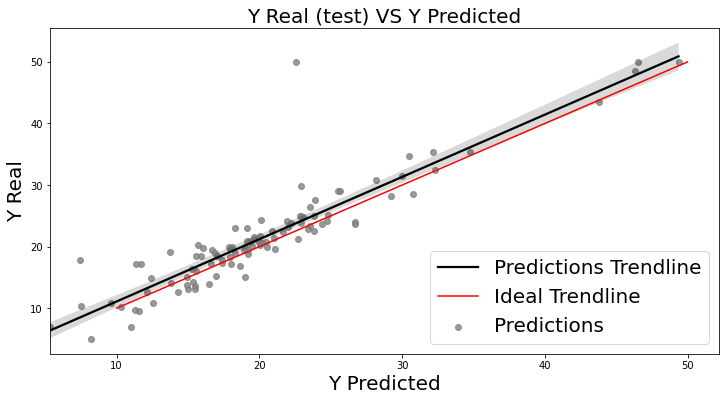

In [84]:
fit_model = model_parameters(seed_ = 42,
                             units_for_layers=[100, 100, 100, 1],
                             optimizer_='Adam',
                             loss_metric='mae',
                             activation = 'relu',
                             model_summary = True,
                             epochs_ = 100,
                             verbose_ = 0,
                             normalized = False,
                             X_train_ = X_train_norm,
                             X_test_ = X_test_norm,
                             y_train_ = y_train,
                             y_test_ = y_test,
                             model_view = True,
                             compiled_model_view = True, 
                             predict_ = True,
                             evaluate_ = True,
                             loss_epoch_plot = True,
                             predict_plot = True,
                             figsize = '12, 6',
                             plot_font_size = 20)